In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [66]:
df = pd.read_csv('gapminder.csv')

In [67]:
y = df['life'].values
X = df['fertility'].values

In [68]:
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [69]:
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

In [70]:
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [71]:
reg = LinearRegression()

In [72]:
X_fertility = X

In [73]:
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

In [74]:
reg.fit(X_fertility, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
y_pred = reg.predict(prediction_space)

In [76]:
print(reg.score(X_fertility, y))

0.6192442167740035


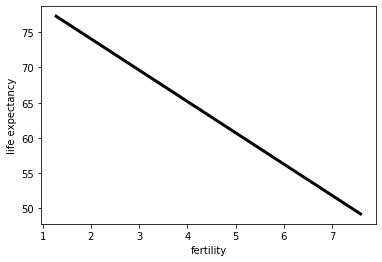

In [77]:
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel('fertility')
plt.ylabel('life expectancy')
plt.show()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [79]:
reg_all = LinearRegression()

In [80]:
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
y_pred = reg_all.predict(X_test)

In [82]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


In [90]:
cv_scores = cross_val_score(reg, X, y, cv=5)

In [91]:
print(cv_scores)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


In [92]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.6168819644425119


In [93]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.6294715754653507
0.5883937741571185


In [104]:
y = df['life']
X = df.drop('life', axis=1)

In [105]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

In [106]:
lasso.fit(X, y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [111]:
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


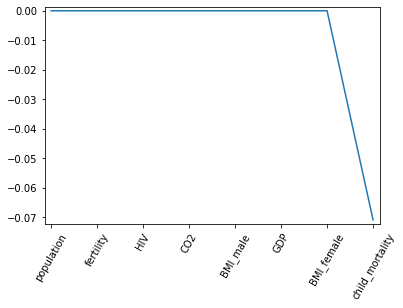

In [113]:
plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [115]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []